<a href="https://colab.research.google.com/github/DavidSalmon13/GenAI/blob/main/HW2/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [ ]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets

## 0. Parameters <a name="parameters"></a>

In [ ]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Display our dataset
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## **Input Normalization**


* **Batch normalization** layers help normalize the activations within the network, making the training process more stable and faster. However, normalizing the input images before feeding them into the network is still important for several reasons:

* **Consistency**: Normalizing input images ensures that the inputs have a consistent scale, which helps the network learn more effectively.


* **Speed of Convergence**: Normalized inputs can lead to faster convergence during training because the network starts with data on a standard scale.


* **Improved Performance**: Normalizing inputs can help improve the overall performance and accuracy of the model.

## 2. Build the model <a name="build"></a>


* **Leaky ReLU** (Leaky Rectified Linear Unit) is a variant of the **ReLU** (Rectified Linear Unit) activation function. Here's why **Leaky ReLU** is often used:


* **Dying ReLU Problem**: In standard ReLU, if the input to a neuron is negative, the output is zero. If a large number of neurons output zero for a long period during training, they may never activate again. This is known as the "dying ReLU" problem.

* **Leaky ReLU Solution**: Leaky ReLU allows a small, non-zero gradient when the unit is not active. Specifically, it outputs α * x for x < 0 and x for x >= 0, where α (alpha) is a small constant (often 0.01). This small gradient ensures that neurons have a chance to recover during training and continue to update their weights.


* **Standard ReLU**: Can lead to zero gradients when the activation is zero, which means weights of the corresponding neurons are not updated during backpropagation.
Leaky ReLU: Provides a small gradient when the input is negative, ensuring that the backpropagation process can still update the weights, promoting better learning.
Better Performance:

* **Leaky ReLU** has been found to sometimes result in better performance compared to standard ReLU, particularly in deeper networks where the dying ReLU problem can be more pronounced.
Empirical Success:

* In many empirical studies and practical applications, **Leaky ReLU** has shown to improve convergence and achieve higher accuracy compared to standard ReLU, especially in deep learning models.

* The introduction of the negative slope **a** ensures that **Leaky ReLU** never completely dies, thus maintaining a small gradient even for negative inputs.

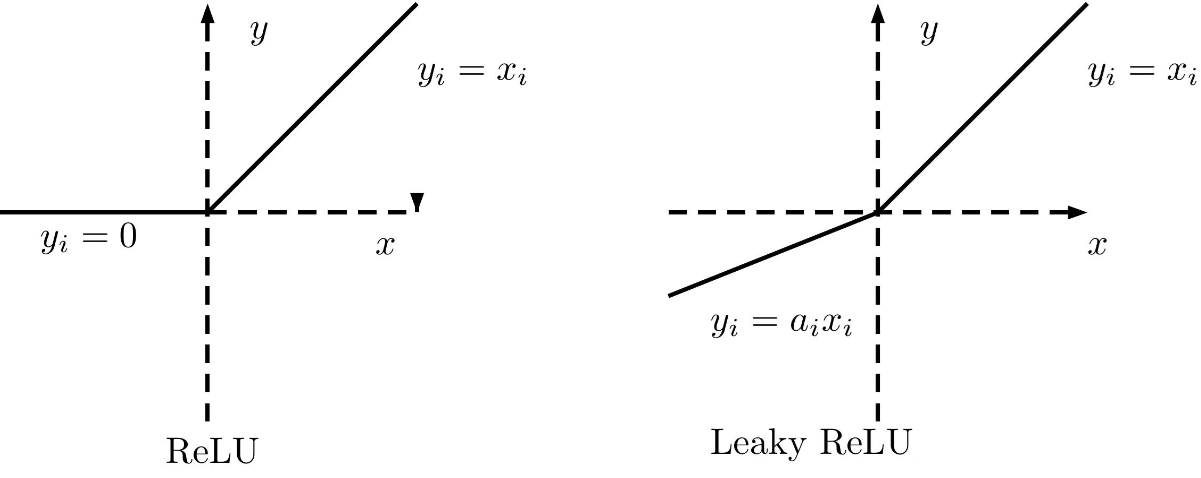

In [ ]:
# Function that will create our sequential cnn model
def create_cnn_model(input_shape):

  model = models.Sequential()


# First Conv2D layer: 32 filters, 3x3 kernel, stride 1, same padding
# Output: (32, 32, 32)
  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", input_shape=input_shape))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())



# Second Conv2D layer: 32 filters, 3x3 kernel, stride 2, same padding (halves spatial dimensions)
# Output: (16, 16, 32) because we increased hte strides, the size of the output decreased

  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

# Third Conv2D layer: 64 filters, 3x3 kernel, stride 1, same padding
# Output: (16, 16, 64)
  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())


# Fourth Conv2D layer: 64 filters, 3x3 kernel, stride 2, same padding (halves spatial dimensions)
# Output: (8, 8, 64)
  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())




  #  Output shape: (4096)
  #  Flattens the 8x8x64 tensor into a 4096-dimensional vector.
  model.add(layers.Flatten())




  # Output shape: (128)
  # Fully connected layer with 128 units
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())  # Batch Normalization
  model.add(layers.ReLU()) # Use the Relu activation function
  model.add(layers.Dropout(rate=0.5))# Set dropout rate to 50%


# The output layer with 10 units for classification
  model.add(layers.Dense(10, activation='softmax'))
  return model

# Call create_cnn_model function
model =  create_cnn_model((32,32,3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 16, 16, 32)        0

## 3. Train the model <a name="train"></a>

In [ ]:
#Use sparse categorical crossentropy as the loss function
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_split = 0.2 # Set validation spli to 20%


)

Epoch 1/10
1250/1250 [==============================] - 28s 21ms/step - loss: 1.5755 - accuracy: 0.4422 - val_loss: 2.1398 - val_accuracy: 0.3558
Epoch 2/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.1540 - accuracy: 0.5918 - val_loss: 1.1099 - val_accuracy: 0.5927
Epoch 3/10
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9787 - accuracy: 0.6581 - val_loss: 1.1788 - val_accuracy: 0.6064
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.8637 - accuracy: 0.6968 - val_loss: 0.9598 - val_accuracy: 0.6614
Epoch 5/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7827 - accuracy: 0.7250 - val_loss: 0.9832 - val_accuracy: 0.6610
Epoch 6/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7077 - accuracy: 0.7515 - val_loss: 0.9857 - val_accuracy: 0.6698
Epoch 7/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6468 - accuracy: 0.7761 - val_loss: 0.8611 -

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
# Evaluate our model
model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 767ms/step - accuracy: 0.7254 - loss: 0.8206


[0.8248381018638611, 0.72079998254776]

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


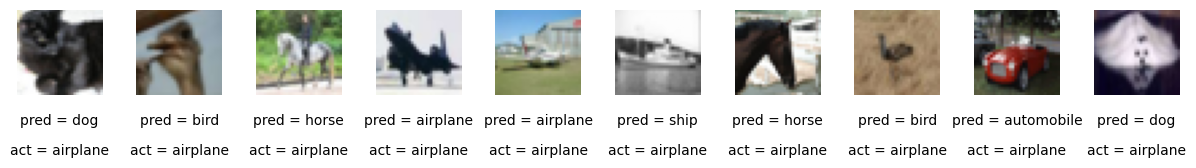

In [ ]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)